# Initialisation

## Installing necessary components

In [11]:
!pip install transformers
!pip install datasets
!pip install osfclient
!pip install sentencepiece
# !git clone https://github.com/yjthay/DZ_GenresAndStyle.git
import csv
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import itertools
from sklearn.preprocessing import MultiLabelBinarizer

from datasets import load_dataset, list_datasets
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer,RobertaModel, RobertaTokenizer

!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/utils.py
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/ekman_mapping.json -P ./data/
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/sentiment_mapping.json -P ./data/
# %cd /content/DZ_GenresAndStyle/

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!osf -p cku2b clone /content/


0files [00:00, ?files/s]
0files [01:33, ?files/s]
Traceback (most recent call last):
  File "c:\users\thayy\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\thayy\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\thayy\anaconda3\Scripts\osf.exe\__main__.py", line 7, in <module>
  File "c:\users\thayy\anaconda3\lib\site-packages\osfclient\__main__.py", line 120, in main
    exit_code = args.func(args)
  File "c:\users\thayy\anaconda3\lib\site-packages\osfclient\cli.py", line 98, in wrapper
    return_value = f(cli_args)
  File "c:\users\thayy\anaconda3\lib\site-packages\osfclient\cli.py", line 180, in clone
    file_.write_to(f)
  File "c:\users\thayy\anaconda3\lib\site-packages\osfclient\models\file.py", line 64, in write_to
    raise RuntimeError("Response has status "
RuntimeError: Response has status code 400.


## Utility functions

In [12]:
from utils import *

## Load full dataset

In [14]:
data = load_dataset('go_emotions')

No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (C:\Users\thayy\.cache\huggingface\datasets\go_emotions\simplified\0.0.0\2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


## Analysis of labels

Total number of train, test and validation samples is 54263
Number of samples with 1 label/labels = 45446
Number of samples with 2 label/labels = 8124
Number of samples with 3 label/labels = 655
Number of samples with 4 label/labels = 37
Number of samples with 5 label/labels = 1


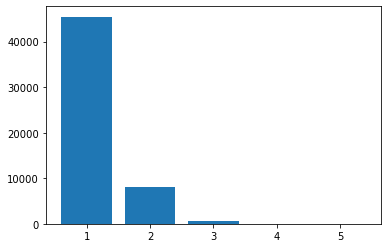

In [8]:
data_labels_all = data['train']['labels'] + data['test']['labels'] + data['validation']['labels']
print("Total number of train, test and validation samples is {}".format(len(data_labels_all)))
_labels, _counts = np.unique([len(y) for y in data_labels_all], return_counts=True)
plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
[print("Number of samples with {} label/labels = {}".format(i, j)) for i, j in zip(_labels, _counts)]
plt.show()

In [6]:
label_mapping = {}
label_names = data['train'].features['labels'].__dict__['feature'].names
for i, emotion in enumerate(label_names):
    label_mapping[i] = emotion.strip()
label_mapping

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

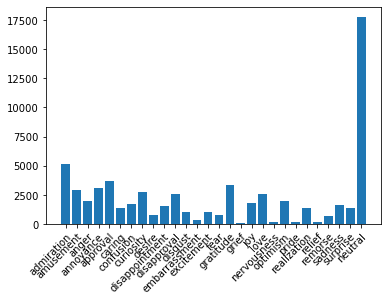

In [7]:
all_labels = list(itertools.chain.from_iterable(data_labels_all))
_labels, _counts = np.unique(all_labels, return_counts=True)
fig, ax = plt.subplots()
fig = plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
ax.set_xticklabels(label_names, horizontalalignment='right', wrap=True, rotation=45)
plt.show()

## Analysis of text

In [8]:
data_text_all = data['train']['text'] + data['test']['text'] + data['validation']['text']
BERT_TYPE_LIST = ['bert-base-cased', 'roberta-base']
bert_type = 'bert-base-cased'
[print(i) for i in data_text_all[:5]]
tokenizer = BertTokenizer.from_pretrained(bert_type)
tokens = tokenizer(data_text_all, padding='max_length', truncation=True, max_length=60, return_tensors="pt")
# tokens = tokenizer(data_text_all, padding=True, return_tensors="pt")

My favourite food is anything I didn't have to cook myself.
Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
WHY THE FUCK IS BAYLESS ISOING
To make her feel threatened
Dirty Southern Wankers


(array([ 5695., 11332., 12211.,  9291.,  8948.,  5198.,  1143.,   317.,
           77.,    51.]),
 array([ 3. ,  8.7, 14.4, 20.1, 25.8, 31.5, 37.2, 42.9, 48.6, 54.3, 60. ]),
 <BarContainer object of 10 artists>)

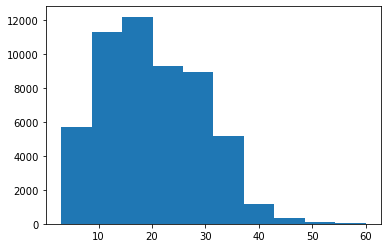

In [9]:
from scipy import stats

max_len = 0
total = 0
a = [sum(i != 0).item() for i in tokens['input_ids']]
plt.hist(a)

In [10]:
for input, att in zip(tokens['input_ids'], tokens['attention_mask']):
    if sum(att) >= 60:
        print(sum(att))
        print(tokenizer.decode(input))

tensor(60)
[CLS] If you ’ re concerned about [ NAME ], then you must still be concerned about [ NAME ]. WAR over last 2 seasons : [ NAME ] : 4. 8, 3. 1 [ NAME ] : 4. 0, 3. 6 [SEP]
tensor(60)
[CLS] YO HERE'S DYNASTY WITH ANOTHER EX CLU SIVE LOOK AT THE ALL NEW MORTAL KOMBAAAAAT COVER ART ( 5 Minutes later )... [SEP]
tensor(60)
[CLS] I THOUGHT IT WAS JUST ONE GUY AND I WAS SERIOUSLY HERE TO POST ABOUT YOUTUBE'S COMMENT ALGORITHM BUT * * OH Y [SEP]
tensor(60)
[CLS] good start [ NAME ]. MORE! MORE TRADES! GET WHAT YOU CAN! SELL, SELL, SELL! # BurnItDown # NobodyIsSafe # ShapeUpO [SEP]
tensor(60)
[CLS] ackchyually, it's * r / woooosh ^ ^ ^ ^ ^ I'm ^ ^ ^ ^ ^ a ^ ^ ^ ^ ^ bot. ^ ^ ^ ^ ^ Complaints ^ ^ ^ ^ ^ should ^ ^ ^ ^ ^ be [SEP]
tensor(60)
[CLS] me : haha im an incel. rApE sHoUlD bE lEgAl! wOmEn ArE iNcApAbLe Of ThInKiNg greaseball who stares [SEP]
tensor(60)
[CLS] NO absolueltey wrong. WE MUST PRIORITIZE GETTING CORPORATE MONEY OUT OF POLITICS OR WE WILL NEVER BE ABLE TO SOLVE AN [SEP]
te

# Training

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

pre_path='/content/drive/MyDrive/DeepZen/'

## Training model for various BERTs

In [17]:
# BERT_TYPE_LIST = ['bert-base-cased','bert-base-uncased','distilbert-base-cased', 'roberta-large','roberta-base','distilroberta-base']
DEVICE = 'cuda'  # cuda or cpu
pre_path='/content/drive/MyDrive/DeepZen/'
model_save_path = pre_path+'model/'
save_path = pre_path+'model/epochs/'
max_length=64
for i in range(10):
    for BERT_TYPE in ['distilbert-base-cased', 'roberta-base','bert-base-cased']:
        print(BERT_TYPE)
        train_dataset = EmotionsDataset(data['train'], device=DEVICE, bert_type=BERT_TYPE, max_length=max_length)
        val_dataset = EmotionsDataset(data['validation'], device=DEVICE, bert_type=BERT_TYPE, max_length=max_length)
        model = BERT_Model((max_length * 768, 512, 28), BERT_TYPE, device=DEVICE) #(input dim, hidden dim, output dim)
        train_losses, val_losses = train(model, train_dataset, val_dataset, epochs=4, lr=5e-5, batch_size=16, show_progress=True, save_path=save_path+BERT_TYPE+"/")

bert-base-cased


Processing Epoch 1: 100%|██████████| 2714/2714 [40:54<00:00,  1.11it/s] 



 Epoch = 1, Train loss = 0.12561, Val loss = 0.11265


FileNotFoundError: [Errno 2] No such file or directory: '/model/epochs/64/epoch_1_0.11265.pt'

## T5 Training

In [ ]:
data = load_dataset('go_emotions')
train_data = T5Dataset(data['train'])
val_data = T5Dataset(data['validation'])

DEVICE = 'cuda'  # cuda or cpu
max_length = config.TGT_MAX_LENGTH
model_save_path = pre_path + 'model/'
save_path = pre_path + 'model/epochs/t5/'

model = T5Model().to(DEVICE)
train_losses, val_losses, y_pred, y_true = train_T5(model, train_data, val_data, epochs=5, lr=5e-5, batch_size=16, show_progress=True, save_path=save_path)

In [ ]:
!osf init
!osf list
!osf -p cku2b upload -r /content/drive/MyDrive/DeepZen/model/epochs /model/

# Analysis of results

Loading the best model based on the validation error

In [18]:
model_names = ['distilbert-base-cased', 'roberta-base','bert-base-cased','t5']
DEVICE = 'cuda' #'cpu'
pre_path = 'osfstorage/'
# pre_path = '/content/drive/MyDrive/DeepZen/'
tuned_models = {}
for name in model_names:
    model_file_path = best_model_filename(pre_path+'model/epochs/'+name+'/')
    tuned_models[name] = torch.load(model_file_path, map_location=torch.device(DEVICE))
    print(model_file_path)
print(tuned_models.keys())

## F1 Score of Testing Set

In [15]:
model_names = ['distilbert-base-cased', 'bert-base-cased', 'roberta-base']
test_data = EmotionsDataset(data['test'], max_length=64, device=DEVICE)
threshold = 0.3

for name in model_names:
    y_pred_test = predict(torch.load('/content/drive/MyDrive/DeepZen/model/epochs/roberta-base/epoch_2_0.15042.pt', map_location=torch.device(DEVICE)), test_data)
    # y_pred_test = predict(tuned_models[name], test_data)
    y_true_test =  test_data.labels.cpu().numpy()
    y_pred_test = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
    f1 = f1_score(y_true_test, y_pred_test, average='macro')
    print(f1_score(y_true_test, y_pred_test, average=None))
    print("Testing - Name: {} yields an f1 score of {}".format(name, f1))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NameError: name 'model' is not defined

In [ ]:
test_data = EmotionsDataset(data['test'], max_length=64, device=DEVICE)
y_pred_test = predict(model, test_data)
y_true_test =  test_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
    f1 = f1_score(y_true_test, y_pred, average='samples')
    print("Testing - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Test

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test[:,:-1], label_mapping)

### tSNE Plot of Ekman - Test

In [ ]:
y_true_test_ekman = convert_to_ekman(reverse_one_hot(y_true_test))
y_true_test_ekman = label_multi_one_hot(y_true_test_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Test

In [ ]:
y_true_test_sentiment = convert_to_sentiment(reverse_one_hot(y_true_test))
y_true_test_sentiment = label_multi_one_hot(y_true_test_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Validation Set

In [ ]:
val_data = EmotionsDataset(data['validation'], max_length=64, device=DEVICE)
y_pred_val = predict(model, val_data)
y_true_val =  val_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_val>=threshold) * np.ones(y_pred_val.shape)
    f1 = f1_score(y_true_val, y_pred, average='samples')
    print("Validation - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Validation

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val[:,:-1], label_mapping)

### tSNE Plot of Ekman - Validation

In [ ]:
y_true_val_ekman = convert_to_ekman(reverse_one_hot(y_true_val))
y_true_val_ekman = label_multi_one_hot(y_true_val_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Validation

In [ ]:
y_true_val_sentiment = convert_to_sentiment(reverse_one_hot(y_true_val))
y_true_val_sentiment = label_multi_one_hot(y_true_val_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Training Set

In [ ]:
train_data = EmotionsDataset(data['train'], max_length=64, device=DEVICE)
y_pred_train = predict(model, train_data)
y_true_train =  train_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_train>=threshold) * np.ones(y_pred_train.shape)
    f1 = f1_score(y_true_train, y_pred, average='samples')
    print("Training - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Training

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train[:,:-1], label_mapping)

### tSNE Plot of Ekman - Training

In [24]:
y_true_train_ekman = convert_to_ekman(reverse_one_hot(y_true_train))
y_true_train_ekman = label_multi_one_hot(y_true_train_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Training

In [ ]:
y_true_train_sentiment = convert_to_sentiment(reverse_one_hot(y_true_train))
y_true_train_sentiment = label_multi_one_hot(y_true_train_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_sentiment[:,:-1], sentiment_label_mapping, figsize=(20,20))



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

a = tokenizer.encode("translate English to French: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
# a = tokenizer.encode("translate English to German: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
print(a)
b = model.generate(a)
print(b)
tokenizer.decode(b[0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

threshold = 0.3
y_pred = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
results = {}
label_mapping = mapping()
for i in range(28):
    emotion = label_mapping[i]
    emotion_true = y_true_test[:, i]
    emotion_pred = y_pred[:, i]
    # results[emotion + "_accuracy"] = accuracy_score(emotion_true, emotion_pred)
    results[emotion + "_precision"], results[emotion + "_recall"], results[emotion + "_f1"], _ = precision_recall_fscore_support(emotion_true, emotion_pred, average="binary")

# test = 0
# count = 0
for i in results:
    print(i,results[i])